[CV](https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_Calculated_Variables_Version4_08_10_17-508c.pdf)
(all_feat)[https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf]

In [5]:
from functions.helpers import *
from functions.implementations import *
import numpy as np

In [6]:
# Load dataset
x_train, x_test, y_train, train_ids, test_ids = load_csv_data('data/dataset')

# Extract the columns name (feature name)
feature_name = np.genfromtxt('data/dataset/x_train.csv', delimiter=',', dtype=str, max_rows=1)
feature_name = feature_name[1:] # The "ids" cols have been removed in the load_csv_data() fucntion

In [7]:
# CREATE STRUCTRED ARRAY

# Give names to colums of the numpy array
# Define data types for each column (adjust as needed based on x_train)
dtype = [(name, x_train.dtype) for name in feature_name]  # Assuming all columns are floats, modify if needed
print(dtype)

# Create the structured array
structured_array_x_train = np.zeros(x_train.shape[0], dtype)

# Assign each column to the structured array
for i, name in enumerate(feature_name):
    structured_array_x_train[name] = x_train[:, i]
print(structured_array_x_train.shape)
print(type(structured_array_x_train))
print(structured_array_x_train)

[(np.str_('_STATE'), dtype('float64')), (np.str_('FMONTH'), dtype('float64')), (np.str_('IDATE'), dtype('float64')), (np.str_('IMONTH'), dtype('float64')), (np.str_('IDAY'), dtype('float64')), (np.str_('IYEAR'), dtype('float64')), (np.str_('DISPCODE'), dtype('float64')), (np.str_('SEQNO'), dtype('float64')), (np.str_('_PSU'), dtype('float64')), (np.str_('CTELENUM'), dtype('float64')), (np.str_('PVTRESD1'), dtype('float64')), (np.str_('COLGHOUS'), dtype('float64')), (np.str_('STATERES'), dtype('float64')), (np.str_('CELLFON3'), dtype('float64')), (np.str_('LADULT'), dtype('float64')), (np.str_('NUMADULT'), dtype('float64')), (np.str_('NUMMEN'), dtype('float64')), (np.str_('NUMWOMEN'), dtype('float64')), (np.str_('CTELNUM1'), dtype('float64')), (np.str_('CELLFON2'), dtype('float64')), (np.str_('CADULT'), dtype('float64')), (np.str_('PVTRESD2'), dtype('float64')), (np.str_('CCLGHOUS'), dtype('float64')), (np.str_('CSTATE'), dtype('float64')), (np.str_('LANDLINE'), dtype('float64')), (np.s

# Feature Selection

We wanted to reduce the number of features to avoid curse od dimentisonlity

We decided to use cony "calculted vriables" because
    - they are ea few
    - they summurce amny other vairables
    - they are considered good indicatior of HT by the clinciacians/the guy wh made the sudy
        cite"s. Thecommon focus of these variables is on health behaviors that are associated with a risk of illness or injury" https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_Calculated_Variables_Version4_08_10_17-508c.pdf

In [8]:
# Select columns that we are going to use for the analysis --> based on physician suggestion (see Paper...)
data_dict = {
    # "name of the var": ["synbol for nan", type of varibale]
    # if "nan" --> means to create a new class for missing values
    # if "no_missing" --> no need for NaN impuation
    # if "countousn" --> put mean
    # if "N" --> trnasg all NaN in that N
    "ACTIN11_": ["nan", "discrete"],
    "ACTIN21_": ["nan", "discrete"],
    "DROCDY3_": [900, "continous"],
    "FC60_": [999, "continous"], # ATTENTION, WAS WRITTE 99900 ..> but in reality is 999
    "FRUTDA1_": ["nan", "continous"],
    "_FRTRESP": ["no_missing", "discrete"],
    "_FRUITEX": ["no_missing", "discrete"],
    "_FRUTSUM": ["nan", "continous"],
    "_HCVU651": [9, "discrete"],
    "_HISPANC": [9, "discrete"],
    "_INCOMG": [9, "discrete"],
    "_LMTACT1": [9, "discrete"],
    "_LMTSCL1": [9, "discrete"],
    "_LMTWRK1": [9, "discrete"],
    "_LTASTH1": [9, "discrete"],
    "_MINAC11": ["nan", "continous"],
    "_MINAC21": ["nan", "continous"],
    "_MISFRTN": ["no_missing", "discrete"],
    "_MISVEGN": ["no_missing", "discrete"],
    "_MRACE1": ["no_missing", "discrete"],
    "_PA30021": [9, "discrete"],
    "_PA150R2": [9, "discrete"],
    "_PA300R2": [9, "discrete"],
    "_PACAT1": [9, "discrete"],
    "_PAINDX1": [9, "discrete"],
    "_PAREC1": [9, "discrete"],
    "_PASTAE1": [9, "discrete"],
    "_PASTRNG": [9, "discrete"],
    "_PNEUMO2": [9, "discrete"],
    "_RACE": [9, "discrete"],
    "_RACEG21": [9, "discrete"],
    "_RACEGR3": [9, "discrete"],
    "_RACE_G1": ["nan", "discrete"],
    "_RFBING5": [9, "discrete"],
    "_RFBMI5": [9, "discrete"],
    "_RFCHOL": [9, "discrete"],
    "_RFDRHV5": [9, "discrete"],
    "_RFHLTH": [9, "discrete"],
    "_RFHYPE5": [9, "discrete"],
    "_RFSEAT2": [9, "discrete"],
    "_RFSEAT3": [9, "discrete"],
    "_RFSMOK3": [9, "discrete"],
    "_SMOKER3": [9, "discrete"],
    "_TOTINDA": [9, "discrete"],
    "_VEG23": [0, "discrete"],
    "_VEGESUM": ["nan", "continous"],
    "_VEGETEX": [1, "discrete"],
    "_VEGLT1": [9, "discrete"],
    "GRENDAY_": ["nan", "continous"],
    "MAXVO2_": [999, "continous"], # ATTENTION, WAS WRITTE 99900 ..> but in reality is 999
    "METVL11_": ["nan", "continous"],
    "METVL21_": ["nan", "continous"],
    "ORNGDAY_": ["nan", "continous"],
    "PA1MIN_": ["nan", "continous"],
    "PA1VIGM_": ["nan", "continous"],
    "PADUR1_": ["nan", "continous"],
    "PADUR2_": ["nan", "continous"],
    "PAFREQ1_": [99000, "continous"],
    "PAFREQ2_": [99000, "continous"],
    "PAMIN11_": ["nan", "continous"],
    "PAMIN21_": ["nan", "continous"],
    "PAMISS1_": [9, "discrete"],
    "PAVIG11_": ["nan", "continous"],
    "PAVIG21_": ["nan", "continous"],
    "VEGEDA1_": ["nan", "continous"],
    "_AGE80": ["nan", "continous"],
    "_AIDTST3": [9, "discrete"],
    "_ASTHMS1": [9, "discrete"],
    "_BMI5": ["nan", "continous"],
    "_CASTHM1": [9, "discrete"],
    "_CHLDCNT": [9, "discrete"],
    "_CHOLCHK": [9, "discrete"],
    "_DRDXAR1": ["nan", "discrete"],
    "_DRNKWEK": [99900, "continous"],
    "_EDUCAG": [9, "discrete"],
    "_FLSHOT6": [9, "discrete"],
    "_FRT16": [0, "discrete"],
    "_FRTLT1": [9, "discrete"]
}

"""
VC calculated but not used because
    - not present in out dataset: '_MICHD', '_VEGRESP" "FTJUDA1_', 'PAINACT2'
    - make no sense: 
        "_LLCPWT" "_DUALCOR" "_DUALUSE" --> HIDDEN or cell phone
        ("_AGE65YR" "_AGEG5YR" _AGE_G--> alredy rpesent in AGE80) 
        "_BMI5CAT" --> altry in _BMI
    # do not like it
        -"_PRACE1": [99/77, "discrete"]
"""

# Names of feautres that we want to use
selected_features = list(data_dict.keys())
print(selected_features)

['ACTIN11_', 'ACTIN21_', 'DROCDY3_', 'FC60_', 'FRUTDA1_', '_FRTRESP', '_FRUITEX', '_FRUTSUM', '_HCVU651', '_HISPANC', '_INCOMG', '_LMTACT1', '_LMTSCL1', '_LMTWRK1', '_LTASTH1', '_MINAC11', '_MINAC21', '_MISFRTN', '_MISVEGN', '_MRACE1', '_PA30021', '_PA150R2', '_PA300R2', '_PACAT1', '_PAINDX1', '_PAREC1', '_PASTAE1', '_PASTRNG', '_PNEUMO2', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_RFBING5', '_RFBMI5', '_RFCHOL', '_RFDRHV5', '_RFHLTH', '_RFHYPE5', '_RFSEAT2', '_RFSEAT3', '_RFSMOK3', '_SMOKER3', '_TOTINDA', '_VEG23', '_VEGESUM', '_VEGETEX', '_VEGLT1', 'GRENDAY_', 'MAXVO2_', 'METVL11_', 'METVL21_', 'ORNGDAY_', 'PA1MIN_', 'PA1VIGM_', 'PADUR1_', 'PADUR2_', 'PAFREQ1_', 'PAFREQ2_', 'PAMIN11_', 'PAMIN21_', 'PAMISS1_', 'PAVIG11_', 'PAVIG21_', 'VEGEDA1_', '_AGE80', '_AIDTST3', '_ASTHMS1', '_BMI5', '_CASTHM1', '_CHLDCNT', '_CHOLCHK', '_DRDXAR1', '_DRNKWEK', '_EDUCAG', '_FLSHOT6', '_FRT16', '_FRTLT1']


In [17]:
import json

# Saving the dictionary to a file
with open("data/suggested_features_dict.json", "w") as f:
    json.dump(data_dict, f)

In [9]:
# Filter to only sleected columns
structured_array_x_train = structured_array_x_train[selected_features]
print(structured_array_x_train.dtype.names)
print(structured_array_x_train)

('ACTIN11_', 'ACTIN21_', 'DROCDY3_', 'FC60_', 'FRUTDA1_', '_FRTRESP', '_FRUITEX', '_FRUTSUM', '_HCVU651', '_HISPANC', '_INCOMG', '_LMTACT1', '_LMTSCL1', '_LMTWRK1', '_LTASTH1', '_MINAC11', '_MINAC21', '_MISFRTN', '_MISVEGN', '_MRACE1', '_PA30021', '_PA150R2', '_PA300R2', '_PACAT1', '_PAINDX1', '_PAREC1', '_PASTAE1', '_PASTRNG', '_PNEUMO2', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_RFBING5', '_RFBMI5', '_RFCHOL', '_RFDRHV5', '_RFHLTH', '_RFHYPE5', '_RFSEAT2', '_RFSEAT3', '_RFSMOK3', '_SMOKER3', '_TOTINDA', '_VEG23', '_VEGESUM', '_VEGETEX', '_VEGLT1', 'GRENDAY_', 'MAXVO2_', 'METVL11_', 'METVL21_', 'ORNGDAY_', 'PA1MIN_', 'PA1VIGM_', 'PADUR1_', 'PADUR2_', 'PAFREQ1_', 'PAFREQ2_', 'PAMIN11_', 'PAMIN21_', 'PAMISS1_', 'PAVIG11_', 'PAVIG21_', 'VEGEDA1_', '_AGE80', '_AIDTST3', '_ASTHMS1', '_BMI5', '_CASTHM1', '_CHLDCNT', '_CHOLCHK', '_DRDXAR1', '_DRNKWEK', '_EDUCAG', '_FLSHOT6', '_FRT16', '_FRTLT1')
[( 1.,  1.,   0., 4.61, 0.71, 1., 0., 0.71, 1., 2., 5., 3., 4., 3., 1.,  60., 140., 0., 0., 

# Remove Column with too many Nan

In [10]:
# threshold over with the column will be discarded
thr_nan = 0.75

# Calculate the threshold for NaN values
threshold = 0.75 * structured_array_x_train.shape[0]  # 75% of the number of rows

# Identify columns to keep
columns_to_keep = [name for name in structured_array_x_train.dtype.names 
                   if np.sum(np.isnan(structured_array_x_train[name])) <= threshold]
columns_to_remove = [name for name in structured_array_x_train.dtype.names 
                   if np.sum(np.isnan(structured_array_x_train[name])) > threshold]
print(f"Columns to remove: {columns_to_remove}")

# Filter
structured_array_x_train = structured_array_x_train[columns_to_keep]
print(structured_array_x_train)

Columns to remove: []
[( 1.,  1.,   0., 4.61, 0.71, 1., 0., 0.71, 1., 2., 5., 3., 4., 3., 1.,  60., 140., 0., 0., 1., 2., 1., 2., 2., 1., 1., 1., 1., nan, 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.21, 0., 1., 0.1 , 26.91, 3.5, 4.5, 0.27, 200.,  0., 30., 30., 2.   , 4.667,  60., 140., 0.,  0.,  0., 0.71, 57.,  2., 3., 20.78, 1., 1., 1., 2., 0.00e+00, 3., nan, 1., 2.)
 (nan, nan, 100., 4.91,  nan, 0., 1.,  nan, 1., 2., 5., 3., 4., 3., 1.,  nan,  nan, 2., 4., 1., 9., 9., 9., 9., 9., 9., 9., 9., nan, 1., 1., 1., 1., 9., 2., 1., 9., 2., 2., 9., 9., 2., 1., 9., 1.,  nan, 1., 9.,  nan, 28.65, nan, nan,  nan,  nan, nan, nan, nan,   nan,   nan,  nan,  nan, 9., nan, nan,  nan, 57., nan, 3., 28.7 , 1., 1., 1., 2., 9.99e+04, 2., nan, 1., 9.)
 ( 1.,  0.,  13., 4.11, 2.  , 1., 0., 2.03, 9., 2., 9., 2., 3., 2., 1.,  90.,   0., 0., 0., 1., 2., 2., 2., 3., 2., 4., 2., 2.,  2., 1., 1., 1., 1., 1., 9., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 2.86, 0., 1., 1.  , 23.95, 3.5, 0. , 0.

# Remove rows/patients with too many Nan

In [ ]:
# ????

# Impute missing Values

In [11]:
# IMPUTE MISSING VALUES
cols_name = structured_array_x_train.dtype.names
for i, col_name in enumerate(cols_name):
    try:
        col_info = data_dict[col_name]
    except KeyError:
        print(f"Column {col_name} not in the dict.")
        continue  # Skip to the next iteration if the column is not found

    type_feature = col_info[1]
    nan_symbol = col_info[0]

    # Extract the column
    col_data = structured_array_x_train[col_name]

    if type_feature == "continous":
        # Choice made: Replace NaN values with the mean of the feature

        # Replace NaN symbols with np.nan so they don't affect the mean calculation (in these way "9999" will not be used for clauclatignthe means)
        col_data[col_data == nan_symbol] = np.nan

        # Calculate the mean without counting NaN values
        mean_value = np.nanmean(col_data)

        # Replace NaN values with the mean
        col_data[np.isnan(col_data)] = mean_value

    elif type_feature == "discrete":
        # Handle NaN values for discrete features
        if nan_symbol == "nan":  # No predefined category for missing
            col_data[np.isnan(col_data)] = -1  # Replace NaN with -1 (i.e. create a new category)
        elif nan_symbol != "no_missing":
            col_data[col_data == nan_symbol] = nan_symbol  # Replace NaN with predefined missing value
            col_data[np.isnan(col_data)] = nan_symbol

    # Update the column in x_train_filtered
    structured_array_x_train[col_name] = col_data

# Check for NaN values in the updated x_train_filtered array
nan_columns = [col_name for col_name in cols_name if np.isnan(structured_array_x_train[col_name]).any()]
print(f"Column with Nan values: {nan_columns}")

Column with Nan values: []


# Split between continous and discrete variable

In [12]:
# Exctract the name of cols with discete and continus name
discrete_keys = [key for key, value in data_dict.items() if value[1] == "discrete"]
continous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
print(f"{discrete_keys}\n{continous_keys}")

# Split in 2 matirces
x_train_dis = structured_array_x_train[discrete_keys]
x_train_con = structured_array_x_train[continous_keys]

['ACTIN11_', 'ACTIN21_', '_FRTRESP', '_FRUITEX', '_HCVU651', '_HISPANC', '_INCOMG', '_LMTACT1', '_LMTSCL1', '_LMTWRK1', '_LTASTH1', '_MISFRTN', '_MISVEGN', '_MRACE1', '_PA30021', '_PA150R2', '_PA300R2', '_PACAT1', '_PAINDX1', '_PAREC1', '_PASTAE1', '_PASTRNG', '_PNEUMO2', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_RFBING5', '_RFBMI5', '_RFCHOL', '_RFDRHV5', '_RFHLTH', '_RFHYPE5', '_RFSEAT2', '_RFSEAT3', '_RFSMOK3', '_SMOKER3', '_TOTINDA', '_VEG23', '_VEGETEX', '_VEGLT1', 'PAMISS1_', '_AIDTST3', '_ASTHMS1', '_CASTHM1', '_CHLDCNT', '_CHOLCHK', '_DRDXAR1', '_EDUCAG', '_FLSHOT6', '_FRT16', '_FRTLT1']
['DROCDY3_', 'FC60_', 'FRUTDA1_', '_FRUTSUM', '_MINAC11', '_MINAC21', '_VEGESUM', 'GRENDAY_', 'MAXVO2_', 'METVL11_', 'METVL21_', 'ORNGDAY_', 'PA1MIN_', 'PA1VIGM_', 'PADUR1_', 'PADUR2_', 'PAFREQ1_', 'PAFREQ2_', 'PAMIN11_', 'PAMIN21_', 'PAVIG11_', 'PAVIG21_', 'VEGEDA1_', '_AGE80', '_BMI5', '_DRNKWEK']


# Correlation

## Continous

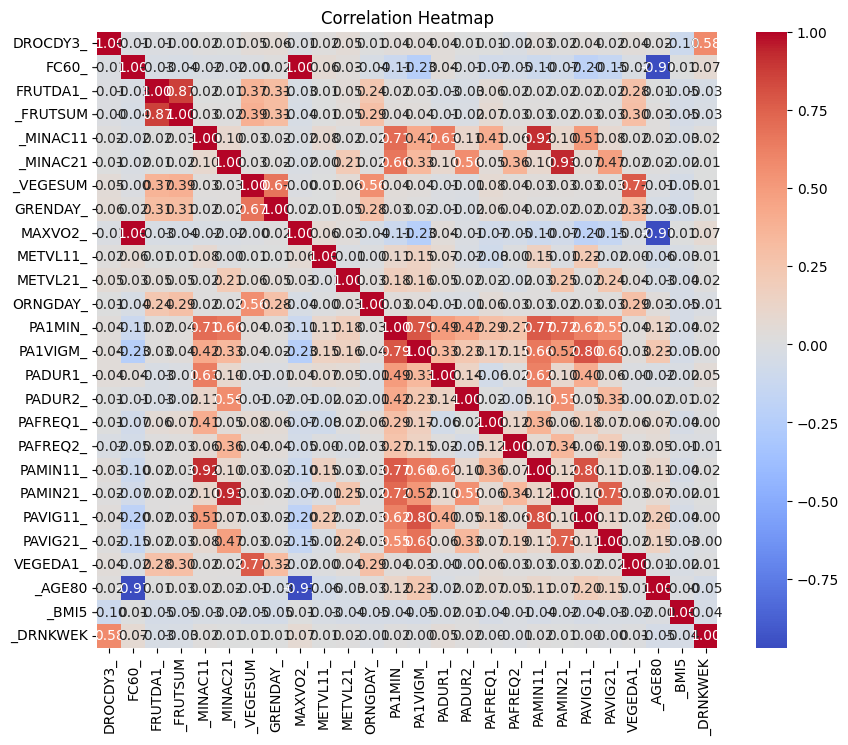

Highly Correlated Features (|Correlation| > 0.90):
FC60_ and MAXVO2_: 1.00
FC60_ and _AGE80: -0.97
_MINAC11 and PAMIN11_: 0.92
_MINAC21 and PAMIN21_: 0.93
MAXVO2_ and _AGE80: -0.97


In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert structured array to a 2D NumPy array for calculations
data = np.array([x_train_con[name] for name in x_train_con.dtype.names]).T

# Step 2: Compute the correlation matrix
correlation_matrix = np.corrcoef(data, rowvar=False)

# Step 3: Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=x_train_con.dtype.names,
            yticklabels=x_train_con.dtype.names)
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Find and print highly correlated features
threshold = 0.90
high_corr_pairs = []

# Loop through the correlation matrix to find pairs of features
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Avoid repeating pairs
        if abs(correlation_matrix[i, j]) > threshold:
            high_corr_pairs.append((x_train_con.dtype.names[i], x_train_con.dtype.names[j], correlation_matrix[i, j]))

# Step 5: Print highly correlated features
print("Highly Correlated Features (|Correlation| > 0.90):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} and {feature2}: {corr_value:.2f}")

In [61]:
[c for c in x_train_con.dtype.names if c not in ["FC60_", "MAXVO2_", "_MINAC11", "_MINAC21"]]

['DROCDY3_',
 'FRUTDA1_',
 '_FRUTSUM',
 '_VEGESUM',
 'GRENDAY_',
 'METVL11_',
 'METVL21_',
 'ORNGDAY_',
 'PA1MIN_',
 'PA1VIGM_',
 'PADUR1_',
 'PADUR2_',
 'PAFREQ1_',
 'PAFREQ2_',
 'PAMIN11_',
 'PAMIN21_',
 'PAVIG11_',
 'PAVIG21_',
 'VEGEDA1_',
 '_AGE80',
 '_BMI5',
 '_DRNKWEK']

## Discrete


To determine which features to remove from your dataset based on the provided correlation pairs, you typically want to keep one feature from each pair of highly correlated features. Here's a structured approach to selecting features to keep and those to remove:

Approach
Group Features by Correlation: For each pair of features that are highly correlated (|Correlation| > 0.90), choose one feature to keep and mark the other for removal.
Avoid Redundancy: If features are part of multiple highly correlated pairs, prioritize keeping the feature that appears most frequently or has more significance in your analysis.

TEMOVE HIGH CORRELATED --> BUT STILL ONE IN EACH GROUP (CLISTERING TO FIND GROUPS AND )

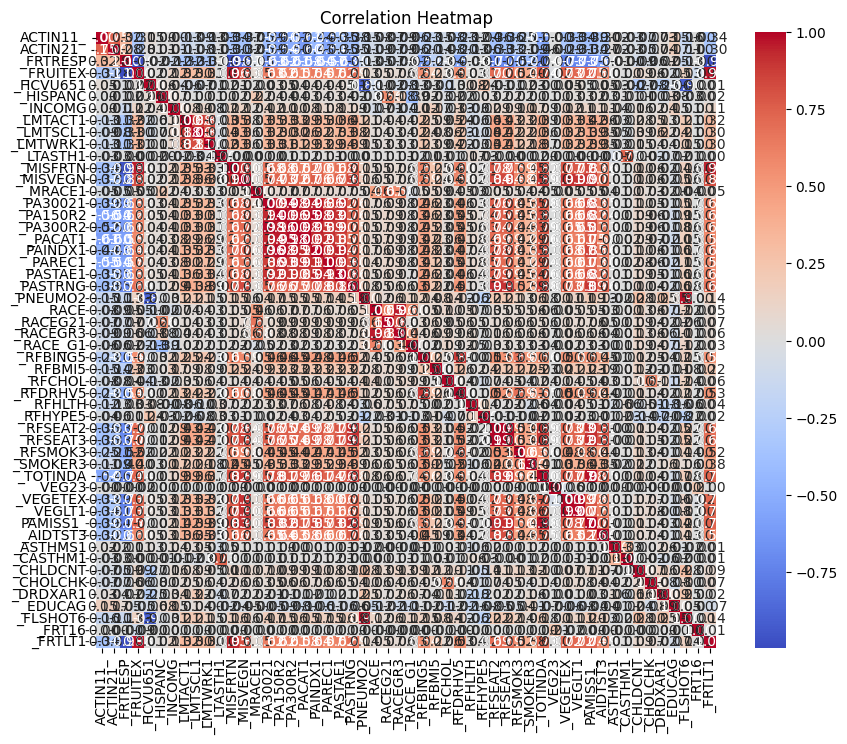

Highly Correlated Features (|Correlation| > 0.90):
ACTIN11_ and ACTIN21_: 0.75
ACTIN11_ and _PA150R2: -0.56
ACTIN11_ and _PA300R2: -0.52
ACTIN11_ and _PACAT1: -0.61
ACTIN11_ and _PAREC1: -0.55
ACTIN11_ and _TOTINDA: -0.54
ACTIN21_ and _PA150R2: -0.54
ACTIN21_ and _PA300R2: -0.50
ACTIN21_ and _PACAT1: -0.60
ACTIN21_ and _PAREC1: -0.54
_FRTRESP and _FRUITEX: -1.00
_FRTRESP and _MISFRTN: -0.96
_FRTRESP and _MISVEGN: -0.83
_FRTRESP and _PA30021: -0.63
_FRTRESP and _PA150R2: -0.62
_FRTRESP and _PA300R2: -0.61
_FRTRESP and _PACAT1: -0.58
_FRTRESP and _PAINDX1: -0.64
_FRTRESP and _PAREC1: -0.57
_FRTRESP and _PASTAE1: -0.63
_FRTRESP and _PASTRNG: -0.70
_FRTRESP and _RFBING5: -0.54
_FRTRESP and _RFDRHV5: -0.54
_FRTRESP and _RFSEAT2: -0.71
_FRTRESP and _RFSEAT3: -0.70
_FRTRESP and _RFSMOK3: -0.52
_FRTRESP and _TOTINDA: -0.74
_FRTRESP and _VEGETEX: -0.73
_FRTRESP and _VEGLT1: -0.73
_FRTRESP and PAMISS1_: -0.75
_FRTRESP and _AIDTST3: -0.60
_FRTRESP and _FRTLT1: -0.98
_FRUITEX and _MISFRTN: 0.96
_F

In [49]:
# Step 1: Convert structured array to a 2D NumPy array for calculations
data = np.array([x_train_dis[name] for name in x_train_dis.dtype.names]).T

# Step 2: Compute the correlation matrix
correlation_matrix = np.corrcoef(data, rowvar=False)

# Step 3: Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=x_train_dis.dtype.names,
            yticklabels=x_train_dis.dtype.names)
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Find and print highly correlated features
threshold = 0.50
high_corr_pairs = []

# Loop through the correlation matrix to find pairs of features
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Avoid repeating pairs
        if abs(correlation_matrix[i, j]) > threshold:
            high_corr_pairs.append((x_train_dis.dtype.names[i], x_train_dis.dtype.names[j], correlation_matrix[i, j]))

# Step 5: Print highly correlated features
print("Highly Correlated Features (|Correlation| > 0.90):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} and {feature2}: {corr_value:.2f}")

##  After removal discrete

Remaining Features after Removal:
['ACTIN11_', '_HISPANC', '_INCOMG', '_LMTWRK1', '_MRACE1', '_PASTAE1', '_PNEUMO2', '_RACEGR3', '_RACE_G1', '_RFBING5', '_RFBMI5', '_RFHLTH', '_RFHYPE5', '_SMOKER3', '_VEG23', '_VEGETEX', '_AIDTST3', '_ASTHMS1', '_CASTHM1', '_CHLDCNT', '_CHOLCHK', '_DRDXAR1', '_EDUCAG', '_FRT16']


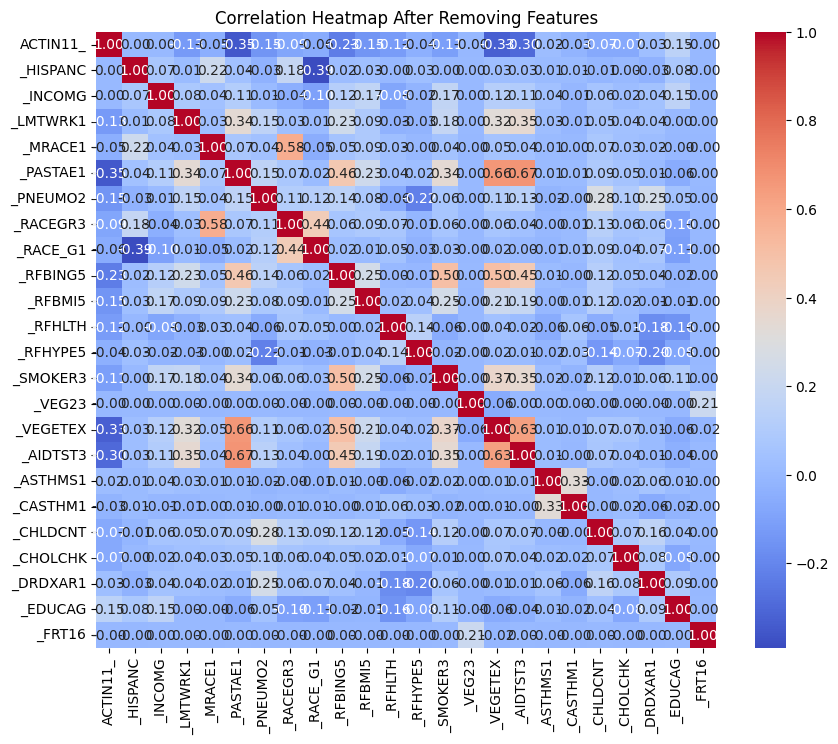

Highly Correlated Features (|Correlation| > 0.90):


In [54]:
# Features to remove (removed duplicates)

features_to_remove = ["ACTIN21_", "_FRTRESP", "_HCVU651", "_LMTSCL1", "_MISVEGN",
                     "_MISVEGN", "_RACEG21", "_PA150R2", "_PA150R2", "_PAINDX1", 
                     "_PAINDX1", "_PAREC1", "_PASTRNG", "_PASTRNG", "_FLSHOT6", 
                     "_RACEG21", "_RFSEAT2", "_RFCHOL", "_RFDRHV5", "_RFSEAT2", 
                     "_RFSMOK3", "_TOTINDA", "_VEGLT1", "PAMISS1_", "_FRTLT1",
                     "_FRUITEX", "_LMTACT1", "_PA30021", "_PA300R2", "_RACE", "_RFSEAT3",
                     "_LTASTH1", "_MISFRTN", "_PACAT1"]


# Step 1: Filter the structured array
filtered_dtype = [name for name in x_train_dis.dtype.names if name not in features_to_remove]
x_train_dis_filtered = x_train_dis[filtered_dtype]

# Step 2: Check the remaining features
remaining_features = filtered_dtype  # This will contain the names of remaining features

# Display the remaining features
print("Remaining Features after Removal:")
print(remaining_features)

# Check if filtering resulted in an empty array
if len(filtered_dtype) == 0:
    print("Warning: No features left after filtering.")
else:
    # Step 2: Convert the filtered structured array to a 2D NumPy array for calculations
    data_filtered = np.array([x_train_dis_filtered[name] for name in x_train_dis_filtered.dtype.names]).T

    # Step 3: Compute the new correlation matrix
    correlation_matrix_filtered = np.corrcoef(data_filtered, rowvar=False)

    # Step 4: Create a new heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=x_train_dis_filtered.dtype.names,
                yticklabels=x_train_dis_filtered.dtype.names)
    plt.title('Correlation Heatmap After Removing Features')
    plt.show()

    # Step 5: Find and print highly correlated features
    threshold = 0.7
    high_corr_pairs = []

    # Loop through the filtered correlation matrix to find pairs of features
    for i in range(correlation_matrix_filtered.shape[0]):
        for j in range(i + 1, correlation_matrix_filtered.shape[1]):  # Avoid repeating pairs
            if abs(correlation_matrix_filtered[i, j]) > threshold:
                high_corr_pairs.append((x_train_dis_filtered.dtype.names[i], x_train_dis_filtered.dtype.names[j], correlation_matrix_filtered[i, j]))

    # Step 6: Print highly correlated features
    print("Highly Correlated Features (|Correlation| > 0.90):")
    for feature1, feature2, corr_value in high_corr_pairs:
        print(f"{feature1} and {feature2}: {corr_value:.2f}")


## BOTH AFTER REMOVAL

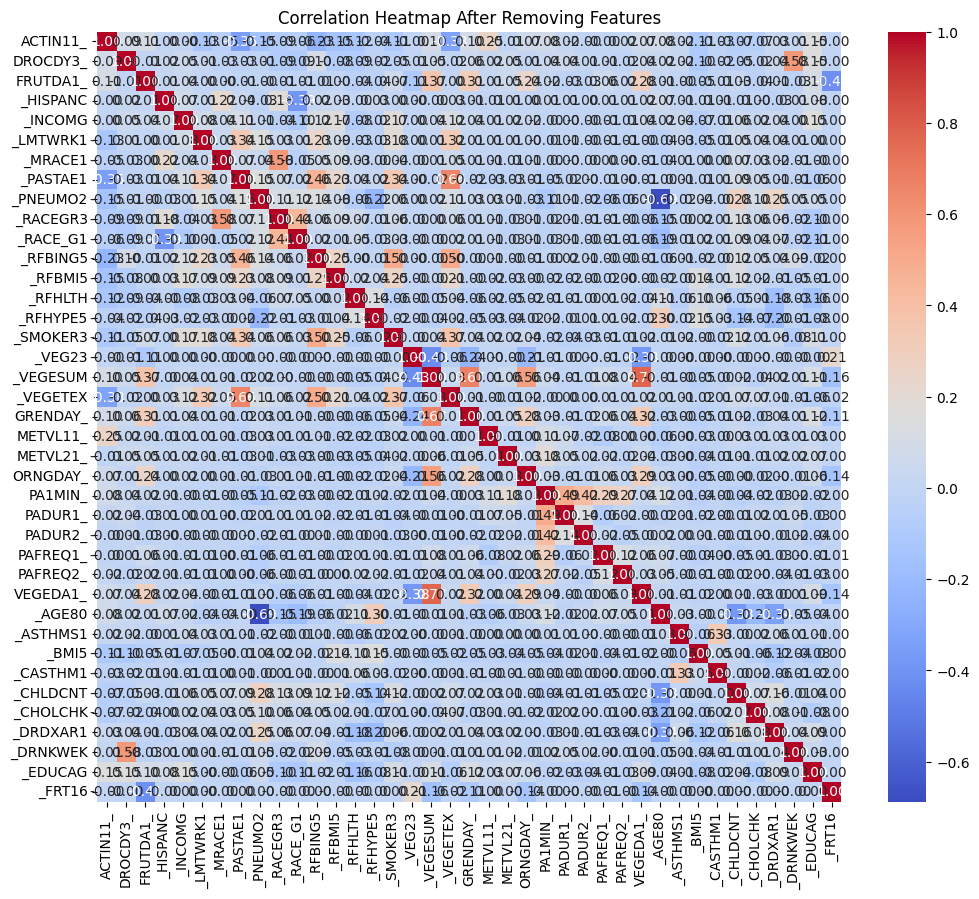

Highly Correlated Features (|Correlation| > 0.80):
DROCDY3_ and _DRNKWEK: 0.58
_MRACE1 and _RACEGR3: 0.58
_PASTAE1 and _VEGETEX: 0.66
_PNEUMO2 and _AGE80: -0.69
_RFBING5 and _SMOKER3: 0.50
_RFBING5 and _VEGETEX: 0.50
_VEGESUM and GRENDAY_: 0.67
_VEGESUM and ORNGDAY_: 0.56
_VEGESUM and VEGEDA1_: 0.77


In [55]:
features_to_remove = [
                            "FC60_", "MAXVO2_", "_MINAC11", "_MINAC21", # continuos(high corr when continous are present)
                            "ACTIN21_", "_FRTRESP", "_HCVU651", "_LMTSCL1", "_MISVEGN",
                            "_MISVEGN", "_RACEG21", "_PA150R2", "_PA150R2", "_PAINDX1", 
                            "_PAINDX1", "_PAREC1", "_PASTRNG", "_PASTRNG", "_FLSHOT6", 
                            "_RACEG21", "_RFSEAT2", "_RFCHOL", "_RFDRHV5", "_RFSEAT2", 
                            "_RFSMOK3", "_TOTINDA", "_VEGLT1", "PAMISS1_", "_FRTLT1",
                            "_FRUITEX", "_LMTACT1", "_PA30021", "_PA300R2", "_RACE", "_RFSEAT3",
                            "_LTASTH1", "_MISFRTN", "_PACAT1", # discrete (high corr when discrete are present)
                            "_FRUTSUM", "_FLSHOT6", "_RFDRHV5", "_TOTINDA", "_AIDTST3", "PAVIG11_" # mix (high corr when all feautre are present)
                            "PA1MIN_", "PAMIN11_", "PAMIN21_", "ACTIN21_", "PA1VIGM_", "PAVIG11_", "PAVIG21_" #VIF
                            ]

# Step 2: Filter the structured array
filtered_dtype = [name for name in structured_array_x_train.dtype.names if name not in features_to_remove]
structured_array_filtered = structured_array_x_train[filtered_dtype]

# Step 3: Convert the filtered structured array to a 2D NumPy array for calculations
data_filtered = np.array([structured_array_filtered[name] for name in structured_array_filtered.dtype.names]).T

# Step 4: Compute the new correlation matrix
correlation_matrix_filtered = np.corrcoef(data_filtered, rowvar=False)

# Step 5: Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=filtered_dtype,
            yticklabels=filtered_dtype)
plt.title('Correlation Heatmap After Removing Features')
plt.show()

# Step 6: Find and print highly correlated features (> 0.80)
threshold = 0.5
high_corr_pairs = []

# Loop through the correlation matrix to find pairs of features
for i in range(correlation_matrix_filtered.shape[0]):
    for j in range(i + 1, correlation_matrix_filtered.shape[1]):  # Avoid repeating pairs
        if abs(correlation_matrix_filtered[i, j]) > threshold:
            high_corr_pairs.append((filtered_dtype[i], filtered_dtype[j], correlation_matrix_filtered[i, j]))

# Step 7: Print highly correlated features
print("Highly Correlated Features (|Correlation| > 0.80):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} and {feature2}: {corr_value:.2f}")

## VIF

In [56]:
# Calculate and print VIF values
vif_values = calculate_vif(data_filtered)
vif_dataframe = dict(zip(filtered_dtype, vif_values))
vif_thr = 10

print("\nVIF Values:")
for feature, vif_value in vif_dataframe.items():
    if vif_value >= vif_thr:
        print(f"{feature}: {vif_value:.2f}")


VIF Values:


In [47]:
loaded_matrix = np.load('data/x_train_discrete_1hot.npy')

print("loaded")

# Function to remove duplicate columns
def remove_duplicate_columns(matrix):
    # Transpose the matrix to make columns into rows
    transposed_matrix = matrix.T
    
    # Identify unique rows (which correspond to unique columns in the original matrix)
    unique_rows, unique_indices = np.unique(transposed_matrix, axis=0, return_index=True)

    print(f"{unique_indices}")
    
    # Create a new matrix with only unique columns
    unique_columns_matrix = matrix[:, unique_indices]
    
    return unique_columns_matrix

# Remove duplicate columns
cleaned_matrix = remove_duplicate_columns(loaded_matrix)

print("cleaned")


vif_values = calculate_vif(cleaned_matrix )
vif_dataframe = dict(zip(filtered_dtype, vif_values))
vif_thr = 10

print("\nVIF Values:")
for feature, vif_value in vif_dataframe.items():
    if vif_value >= vif_thr:
        print(f"{feature}: {vif_value:.2f}")

loaded
[59 82 30 36  1 33 21 76 56 71 32 20 68 31 19 40 29 17 18 34 22 70  6 78
 63 72 42 75 69 52 62 15  7 23  4  8 11 26  9 58 74 24 57 81 46 53 27 12
 77 61  3 48 50  0 79 44 80 43  2 25 41 49 47 60 51 10 13 55 54 45 73 28
  5 16 14 65 67]
cleaned

VIF Values:
ACTIN11_: inf
FRUTDA1_: inf
_FRTRESP: inf
_INCOMG: inf
_LTASTH1: inf
_MRACE1: inf
_PNEUMO2: inf
_RACE_G1: 13.40
_RFBING5: inf
_RFBMI5: 31.81
_RFCHOL: inf
_RFHLTH: inf
_RFHYPE5: 33.87
_RFSMOK3: inf
_SMOKER3: 12.99
_VEGETEX: 19.99
GRENDAY_: inf
PADUR1_: 12.10
PAFREQ1_: 20.85
PAFREQ2_: 66.96
_ASTHMS1: inf
_DRDXAR1: inf
_FRT16: inf


In [ ]:
[
    "ACTIN11_", no
    "_HISPANC",
    "_INCOMG", # money earned
    "_LMTWRK1", no 
    "_MRACE1", no
    "_PASTAE1", no
    "_PNEUMO2", yes (had penuomnia)
    "_RACEGR3", yes
    "_RACE_G1",no
    "_RFBING5", yes #bindgdrinkers
    "_RFBMI5", mo #aldery have bmi
    "_RFHLTH", no
    "_RFHYPE5", yes
    "_SMOKER3", yes
    "_VEG23", no
    "_VEGETEX", no
    "_AIDTST3", no
    "_ASTHMS1", yes
    "_CASTHM1",no
    "_CHLDCNT",no
    "_CHOLCHK", yes
    "_DRDXAR1", yes
    "_EDUCAG", yes
    "_FRT16" yes
]

## FINAL CORR

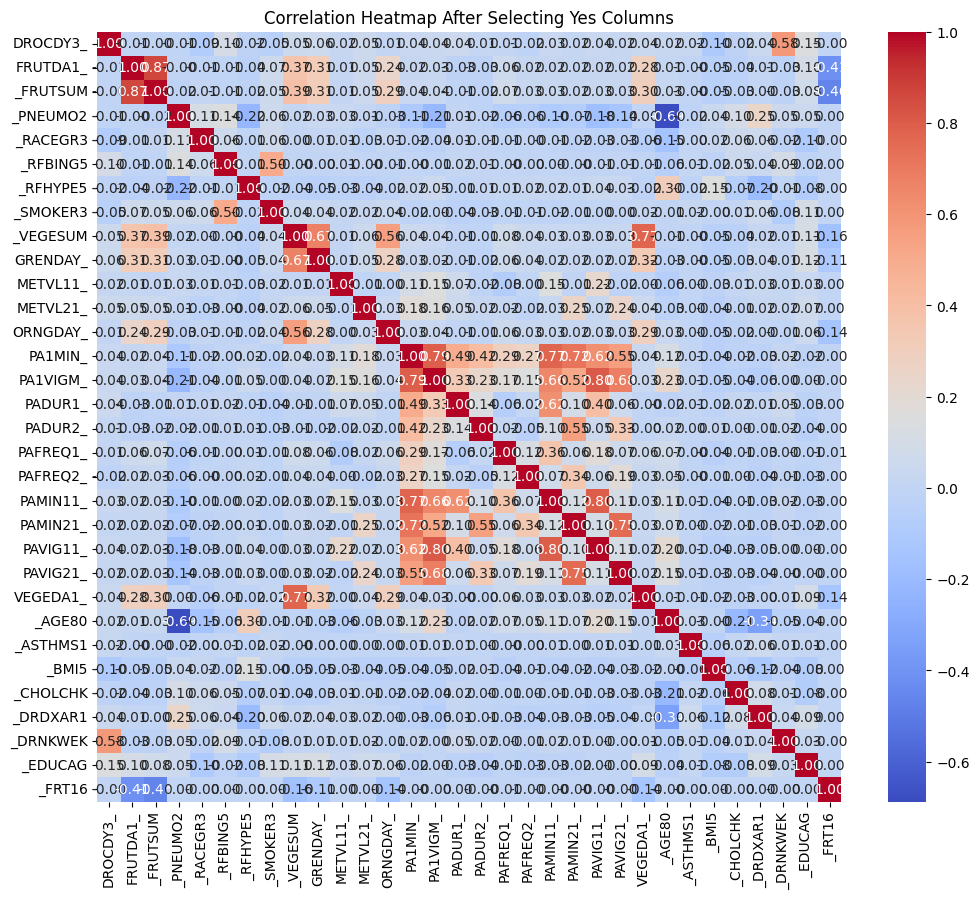

Highly Correlated Features (|Correlation| > 0.80):
FRUTDA1_ and _FRUTSUM: 0.87
PA1VIGM_ and PAVIG11_: 0.80
PAMIN11_ and PAVIG11_: 0.80


NameError: name 'sm' is not defined

In [64]:
import pandas as pd
yes_cols = [
    "_PNEUMO2", "_RACEGR3", "_RFBING5", "_RFHYPE5", "_SMOKER3", 
    "_ASTHMS1", "_CHOLCHK", "_DRDXAR1", "_EDUCAG", "_FRT16",

    'DROCDY3_', 'FRUTDA1_', '_FRUTSUM', '_VEGESUM', 'GRENDAY_', 
    'METVL11_', 'METVL21_', 'ORNGDAY_', 'PA1MIN_', 'PA1VIGM_', 
    'PADUR1_', 'PADUR2_', 'PAFREQ1_', 'PAFREQ2_', 'PAMIN11_', 
    'PAMIN21_', 'PAVIG11_', 'PAVIG21_', 'VEGEDA1_', '_AGE80', 
    '_BMI5', '_DRNKWEK'
]
# Filter the structured array to include only features in yes_cols
filtered_dtype = [name for name in structured_array_x_train.dtype.names if name in yes_cols]
structured_array_filtered = structured_array_x_train[filtered_dtype]

# Check if filtering resulted in an empty array
if len(filtered_dtype) == 0:
    print("Warning: No features left after filtering.")
else:
    # Convert the filtered structured array to a 2D NumPy array for calculations
    data_filtered = np.array([structured_array_filtered[name] for name in structured_array_filtered.dtype.names]).T

    # Compute the new correlation matrix
    correlation_matrix_filtered = np.corrcoef(data_filtered, rowvar=False)

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=filtered_dtype,
                yticklabels=filtered_dtype)
    plt.title('Correlation Heatmap After Selecting Yes Columns')
    plt.show()

    # Find and print highly correlated features (> 0.80)
    threshold = 0.8
    high_corr_pairs = []

    # Loop through the correlation matrix to find pairs of features
    for i in range(correlation_matrix_filtered.shape[0]):
        for j in range(i + 1, correlation_matrix_filtered.shape[1]):  # Avoid repeating pairs
            if abs(correlation_matrix_filtered[i, j]) > threshold:
                high_corr_pairs.append((filtered_dtype[i], filtered_dtype[j], correlation_matrix_filtered[i, j]))

    # Print highly correlated features
    print("Highly Correlated Features (|Correlation| > 0.80):")
    for feature1, feature2, corr_value in high_corr_pairs:
        print(f"{feature1} and {feature2}: {corr_value:.2f}")





# Encode discrete Variables
Choosen method: one-hot encoding

In [9]:
# Create an empty list to hold the new dtype for the one-hot encoded array
new_dtype = []

# Create a mapping for one-hot encoding
for col in discrete_keys:
    unique_values = np.unique(x_train_dis[col])
    for value in unique_values:
        new_col_name = f"{col}_{value}"  # e.g., feature2_A
        new_dtype.append((new_col_name, 'i4'))  # Use integer type for one-hot encoding

# Create a new structured array with the updated dtype
one_hot_encoded_array = np.zeros(x_train_dis.shape[0], dtype=new_dtype)

# Fill the new structured array with one-hot encoded values
for col in discrete_keys:
    unique_values = np.unique(x_train_dis[col])
    
    for value in unique_values:
        # Create a mask where the current column equals the unique value
        mask = (x_train_dis[col] == value)
        
        # Fill the corresponding column in the new array with 1 where the mask is True
        one_hot_encoded_array[f"{col}_{value}"][mask] = 1

# Output the new one-hot encoded structured array and its column names
print(one_hot_encoded_array)
print("One-hot encoded columns:", one_hot_encoded_array.dtype.names)

x_train_dis_enc = one_hot_encoded_array

[(0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0)
 (1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 

# Normalise continous Variables

In [10]:
#ATTENTION:
#- test and train must be normlized separated (aboid info leckage)
#- normalization happens along feautures, i.e. each column

x_train_con_norm = x_train_con.copy()

# Normalization technique
normalization = "minmax"  
"""
Normalization Techniques: When to Use

1. **Min-Max Normalization**: "minmax"
   - Best when features have different ranges without significant outliers. 

2. **Z-score Normalization**: "z-score"
   - Preferred for normally distributed data; helps meet model assumptions for linear regression.

3. **Robust Scaling**: "z-score"
   - Ideal for datasets with significant outliers; minimizes their influence on scaling.
"""

print("Values before normalization:\n", x_train_con_norm)

# Normalize based on the selected technique for all continuous columns
for col_name in x_train_con_norm.dtype.names:
    column = x_train_con_norm[col_name]

    if normalization == "minmax":
        # Replace NaNs with the mean of the column for calculation
        mean_value = np.nanmean(column)
        column[np.isnan(column)] = mean_value  # Replace NaNs with mean for calculation

        # Min-Max Normalization
        min_value = np.min(column)
        max_value = np.max(column)
        column = (column - min_value) / (max_value - min_value)

    elif normalization == "z-score":
        # Replace NaNs with the mean of the column for calculation
        mean_value = np.nanmean(column)
        std_value = np.nanstd(column)  # Standard deviation ignoring NaNs
        column[np.isnan(column)] = mean_value  # Fill NaNs with mean
        column = (column - mean_value) / std_value

    elif normalization == "robust_scalar":
        # Replace NaNs with the median of the column for calculation
        median_value = np.nanmedian(column)
        q1 = np.nanpercentile(column, 25)  # 25th percentile
        q3 = np.nanpercentile(column, 75)  # 75th percentile
        iqr = q3 - q1  # Interquartile range
        column[np.isnan(column)] = median_value  # Fill NaNs with median
        column = (column - median_value) / iqr

    # Update the column in x_train_con_norm
    x_train_con_norm[col_name] = column

# Output the normalized structured array
print(type(x_train_con_norm))
print("Values after normalization:\n", x_train_con_norm)

Values before normalization:
 [(  0., 4.61, 0.71      , 0.71      ,  60.        , 140.        , 1.21      , 0.1      , 26.91, 3.5       , 4.5     , 0.27      , 200.        ,   0.        , 30.        , 30.        , 2.        , 4.667     ,  60.        , 140.      ,  0.        ,  0.        , 0.71      , 57., 20.78      ,   0.       )
 (100., 4.91, 1.00496132, 1.36179859, 229.53973791, 129.76062637, 1.94943283, 0.5679693, 28.65, 4.17054711, 2.887683, 0.29685307, 482.81355098, 131.11862237, 63.42027228, 71.68419145, 4.02758224, 3.12804804, 313.13258374, 181.398664, 82.10055983, 51.00443817, 0.80299894, 57., 28.7       , 262.7150643)
 ( 13., 4.11, 2.        , 2.03      ,  90.        ,   0.        , 2.86      , 1.       , 23.95, 3.5       , 0.      , 0.43      ,  90.        ,   0.        , 30.        , 71.68419145, 3.        , 3.12804804,  90.        ,   0.      ,  0.        ,  0.        , 1.        , 65., 28.03300679,  93.       )
 ...
 (  0., 3.92, 1.        , 1.        , 120.        ,   0.

# Correlation
Before encoding check if some cols are correlated.
Maybe remove the ones highly correlated.

In [18]:
# CORRELATION

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = np.corrcoef(x_train_filtered, rowvar=False)

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

NameError: name 'x_train_filtered' is not defined

In [ ]:
# Calculate the correlation matrix
correlation_matrix =  np.corrcoef(x_train_filtered, rowvar=False)

# Create a mask for correlations greater than 0.6
mask = (np.abs(correlation_matrix) > 0.9) & (correlation_matrix != 1)

# Get the pairs of columns with high correlation
high_corr_pairs = []

for row in range(correlation_matrix.shape[0]):
    for col in range(correlation_matrix.shape[1]):
        if mask[row, col]:
            high_corr_pairs.append((row, col, correlation_matrix[row, col]))

# Print the pairs
for pair in high_corr_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")

# Other plots

In [ ]:
import matplotlib.pyplot as plt
x = x_train_filtered[:,np.where(np.array(useful_cols) == "_BMI5")[0][0]]
y = x_train_filtered[:,np.where(np.array(useful_cols) == "_AGE80")[0][0]]
plt.scatter(x, y, s=1,c=y_train, cmap='viridis')

plt.xlabel("_BMI5")
plt.ylabel("_AGE80")
plt.colorbar()
plt.show()

#DROCDY3_ --> Calculated variable for drink-occasions-per-day
#FRUTDA1_ --> Calculated variable for fruit intake in times per day
#_FRUTSUM Calculated variable for total fruits consumed per day
# MAXVO2_ Calculated variable for estimated age-gender specific maximum oxygen consumption. MAXVO2_is derived from SEX and AGE.
# FC60_ Calculated variable for estimated functional capacity

# Feature engeneering

In [13]:
# Set the variable to determine the type of processing
use = 7

# Convert structured arrays to numpy arrays once to avoid multiple conversions
x_train_con_np = x_train_con_norm.copy()
x_train_dis_np = x_train_dis_enc.copy()

if use == 0:
    # Use all variables
    x_train_final = np.concatenate([x_train_con_np, x_train_dis_np], axis=1)

elif use == 1:
    # Only use continuous variables
    x_train_final = x_train_con_np

elif use == 2:
    # Only use discrete variables
    x_train_final = x_train_dis_np

elif use == 3:
    # Use PCA with only continuous variables
    thr_var = 0.9
    x_train_pca = pca(x_train_con_np, variance_threshold=thr_var)
    # Choose the variant based on the last case
    x_train_final = x_train_pca  # Using PCA on continuous variables

elif use == 4:
    # Polynomial expansion, only continuous
    x_train_final = build_poly(x_train_con_np, degree=3)

elif use == 5:
    # Polynomial expansion, all features
    x_train_final = np.c([build_poly(x_train_con_np, degree=3), x_train_dis_np])

elif use == 6:
    # Only continuous with constant term [1 | x_train]
    x_train_final = np.c_[np.ones((x_train_con_np.shape[0], 1)), x_train_con_np]

elif use == 7:
    # Only use BMI and AGE80
    x_train_final = x_train_con_norm[["_AGE80", "_BMI5"]]

# REMOVE FEAT HIGHLY CORRETEDATE
# TODO: -----

# UES MORE SPEIFC FEAT: AGE, BMI, HEIG,T DRUNK, ...
# TODO: -----

else:
    raise ValueError("Invalid option for 'use'.")

print(x_train_final.dtype)
print(x_train_final.shape)

{'names': ['_AGE80', '_BMI5'], 'formats': ['<f8', '<f8'], 'offsets': [1984, 2024], 'itemsize': 2568}
(328135,)


# Cross Validation

In [97]:
def stratified_k_fold_cross_validation(y, tx, k_folds, max_iters, gamma, lambda_ridge, optimization_method, seed=42):
    """Performs Stratified K-Fold Cross-Validation for gradient descent model training using numpy.

    Args:
        y (np.array): Labels (target values), shape=(N,)
        tx (np.array): Input data, shape=(N, D)
        k_folds (int): Number of folds (k) for cross-validation
        max_iters (int): Number of iterations for gradient descent
        gamma (float): Learning rate for gradient descent

    Returns:
        dict: Cross-validation metrics for each fold for both training and validation sets
    """
    # Set random seed for reproducibility
    np.random.seed(seed)

    # Shuffle the data
    indices = np.arange(len(y))
    np.random.shuffle(indices)
    y, tx = y[indices], tx[indices]

    # Group indices by class
    #finds the indices corresponding to that class and stores them in the class_indices dictionary
    class_indices = {}
    for class_label in np.unique(y):
        class_indices[class_label] = np.where(y == class_label)[0]

    # Create k folds
    # Each sublist will eventually hold the indices for a fold.
    folds = [[] for _ in range(k_folds)]

    for class_label, indices in class_indices.items():
        np.random.shuffle(indices)  # Shuffle indices for the current class
        fold_sizes = [len(indices) // k_folds] * k_folds # number of samples per fold
        for i in range(len(indices) % k_folds):  #those remaining samples are distributed across the first few folds.
            fold_sizes[i] += 1  # Distribute remaining samples

        current_index = 0
        #r, indices are assigned to each fold in order, ensuring that the samples from each class are distributed proportionally.
        for fold_index in range(k_folds):
            folds[fold_index].extend(indices[current_index:current_index + fold_sizes[fold_index]])
            current_index += fold_sizes[fold_index]

    # Train and validate
    fold_metrics = []  # Store metrics for both training and validation sets
    best_w = None  # Best model (i.e. the parameters that compose it)
    best_accuracy = 0  # Track the best accuracy
    best_f1_score = 0

    for fold in range(k_folds):
        # The current fold is the validation set
        val_indices = folds[fold] 
        # The training set is constructed by concatenating all indices from the other folds
        train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold])

        # Split the dataset into training and validation sets for this fold
        x_train_fold, x_val_fold = tx[train_indices], tx[val_indices]
        y_train_fold, y_val_fold = y[train_indices], y[val_indices]

        # Initialize weights (can also be random)
        initial_w = np.zeros(x_train_fold.shape[1])

        # Train the model using mean_squared_error_gd
        if optimization_method == "mse_gd":
            w, train_loss = mean_squared_error_gd(y_train_fold, x_train_fold, initial_w, max_iters, gamma)
        elif optimization_method == "ridge":
            w, train_loss = ridge_regression(y_train_fold, x_train_fold, lambda_=lambda_ridge)
        elif optimization_method == "least_squares":
            w, train_loss = least_squares(y_train_fold, x_train_fold)

        # Compute prediction for train and test set
        val_predictions = np.sign(np.dot(x_val_fold, w)) # ATTENTION: +1, -1
        train_predictions = np.sign(np.dot(x_train_fold, w))

        # Compute training loss (MSE) --> calculated before
        # Compute validation loss (MSE)
        val_error = y_val_fold - np.dot(x_val_fold, w)  # Validation error = true_label - predictions
        val_loss = calculate_mse(val_error)  # MSE on validation set

        # Calculate accuracy on validation set and training set
        val_accuracy = np.mean(val_predictions == y_val_fold)
        train_accuracy = np.mean(train_predictions == y_train_fold)

        # Calculate F1 score on validation set and  training set
        val_f1_score = compute_f1_score(y_val_fold, val_predictions)
        train_f1_score = compute_f1_score(y_train_fold, train_predictions)

        # Append metrics for this fold
        fold_metrics.append({
            'fold': fold + 1,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'val_f1_score': val_f1_score,
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'train_f1_score': train_f1_score
        })

        # Print fold metrics
        print(f"Fold {fold + 1}/{k_folds}: Validation Loss={val_loss}, Accuracy={val_accuracy}, F1={val_f1_score}")
        print(f"Fold {fold + 1}/{k_folds}: Training Loss={train_loss}, Accuracy={train_accuracy}, F1={train_f1_score}")
        print("\n")

        # Update best model if current validation accuracy is better
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_f1_score = val_f1_score
            best_w = w
    
    # Calculate means across folds
    mean_val_accuracy = np.mean([metrics['val_accuracy'] for metrics in fold_metrics])
    mean_val_f1_score = np.mean([metrics['val_f1_score'] for metrics in fold_metrics])
    mean_train_accuracy = np.mean([metrics['train_accuracy'] for metrics in fold_metrics])
    mean_train_f1_score = np.mean([metrics['train_f1_score'] for metrics in fold_metrics])


    return fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score


In [98]:
# Hyperparameters
max_iters = 10 # Number of iterations for gradient descent
gamma = 0.1  # Learning rate
k_folds = 10  # Number of folds for cross-validation
lambda_ridge = 0.1
optimization_method = "mse_gd" #mse_gd, msg_sgd, least_squares, ridge

# Run cross-validation
fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation(
    y = y_train, 
    tx = x_train, 
    k_folds = k_folds, 
    max_iters = max_iters, 
    gamma = gamma, 
    lambda_ridge = lambda_ridge, 
    optimization_method = optimization_method
    )


print(best_accuracy)
print(best_f1_score)
print(best_w)

GD iter. 1/10: loss=0.25, w0=0.006496526496682637, w1=0.0005198924188934538
GD iter. 2/10: loss=0.22901576470805293, w0=0.012365466512230434, w1=0.0009892974832182778
GD iter. 3/10: loss=0.21112831025703668, w0=0.017656092514947146, w1=0.0014121324431987322
GD iter. 4/10: loss=0.19587942315104678, w0=0.022413877797004746, w1=0.001792012984591979
GD iter. 5/10: loss=0.1828787029609883, w0=0.026680788911372044, w1=0.0021322764373781205
GD iter. 6/10: loss=0.17179352618939966, w0=0.03049555560239492, w1=0.002436003198306647
GD iter. 7/10: loss=0.16234049545625437, w0=0.033893919962121495, w1=0.002706036504761066
GD iter. 8/10: loss=0.154278154182202, w0=0.03690886641116364, w1=0.0029450006868244278
GD iter. 9/10: loss=0.14740077947900826, w0=0.03957083397984287, w1=0.0031553180146635445
GD iter. 10/10: loss=0.14153309367540906, w0=0.04190791225179506, w1=0.0033392242493363133
Fold 1/10: Validation Loss=0.13608092250355705, Accuracy=0.5, F1=1.0
Fold 1/10: Training Loss=0.14153309367540906,

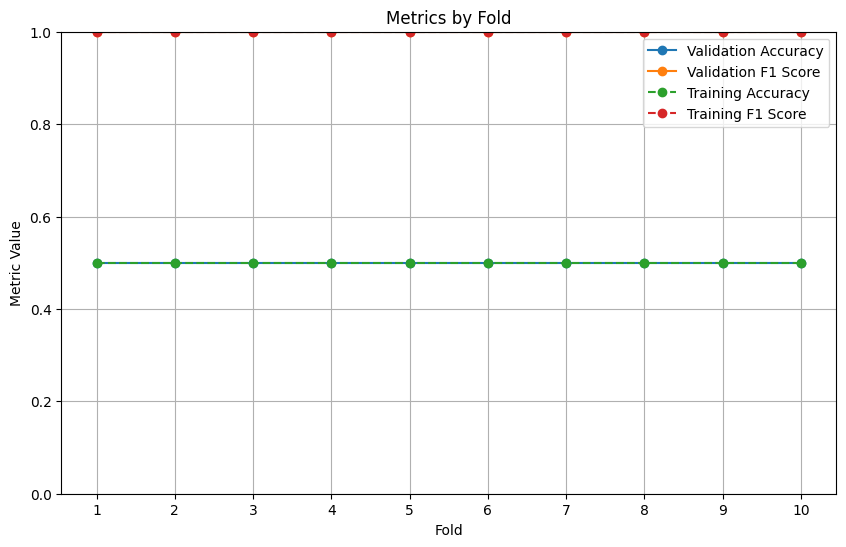

In [99]:
"""Plot the accuracy and F1 score for each fold."""
folds = [metrics['fold'] for metrics in fold_metrics]
val_accuracies = [metrics['val_accuracy'] for metrics in fold_metrics]
val_f1_scores = [metrics['val_f1_score'] for metrics in fold_metrics]
train_accuracies = [metrics['train_accuracy'] for metrics in fold_metrics]
train_f1_scores = [metrics['train_f1_score'] for metrics in fold_metrics]

plt.figure(figsize=(10, 6))

# Plot Validation Accuracy and F1 Score
plt.plot(folds, val_accuracies, label='Validation Accuracy', marker='o', linestyle='-')
plt.plot(folds, val_f1_scores, label='Validation F1 Score', marker='o', linestyle='-')
plt.plot(folds, train_accuracies, label='Training Accuracy', marker='o', linestyle='--')
plt.plot(folds, train_f1_scores, label='Training F1 Score', marker='o', linestyle='--')

plt.title('Metrics by Fold')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.xticks(folds)
plt.ylim(0, 1)  # Assuming accuracy and F1 scores are between 0 and 1
plt.legend()
plt.grid()
plt.show()

Fold 1/10: Validation Loss=0.09774528311489915, Accuracy=0.49913733609385785, F1=0.9991365912623037
Fold 1/10: Training Loss=0.1006223060107327, Accuracy=0.49829351535836175, F1=0.9982905982905983


Fold 2/10: Validation Loss=0.1003005576272579, Accuracy=0.4975845410628019, F1=0.9975786924939467
Fold 2/10: Training Loss=0.1003330870068894, Accuracy=0.49842773325152434, F1=0.9984252573359963


Fold 3/10: Validation Loss=0.10176223181175034, Accuracy=0.4979296066252588, F1=0.9979253112033196
Fold 3/10: Training Loss=0.10016292607822516, Accuracy=0.4983702112973118, F1=0.9983675507499663


Fold 4/10: Validation Loss=0.09967957310627304, Accuracy=0.49913733609385785, F1=0.9991365912623037
Fold 4/10: Training Loss=0.10040807639419007, Accuracy=0.4981976454346742, F1=0.9981943910872071


Fold 5/10: Validation Loss=0.09948813132882721, Accuracy=0.4984472049689441, F1=0.9984447900466563
Fold 5/10: Training Loss=0.10042255266384867, Accuracy=0.4983702112973118, F1=0.9983675507499663


Fold 6/10

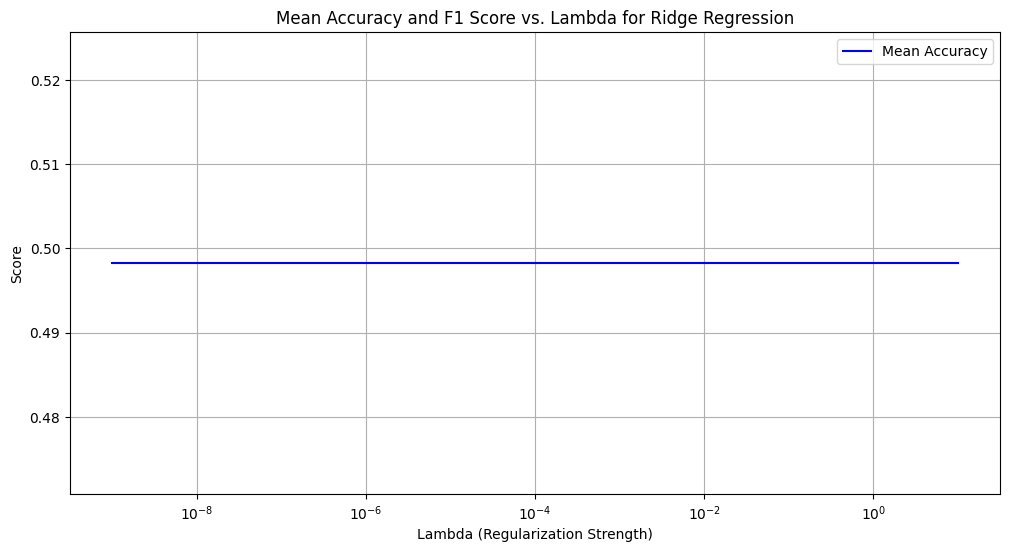

In [100]:
mean_accuracies = []
mean_f1_scores = []
lambdas = np.logspace(-9, 1, 100)


for lambda_ridge in lambdas:
    # Perform stratified k-fold cross-validation
    fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation(
        y = y_train, 
        tx = x_train, 
        k_folds = k_folds, 
        max_iters = max_iters, 
        gamma = gamma, 
        lambda_ridge = 0.1, 
        optimization_method = "ridge"
        )
    
    mean_accuracies.append(mean_val_accuracy)
    mean_f1_scores.append(mean_val_f1_score)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambdas, mean_accuracies, label='Mean Accuracy', color='blue')
#plt.plot(lambdas, mean_f1_scores, label='Mean F1 Score', color='orange')

plt.xscale('log')  # Log scale for lambda
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Score')
plt.title('Mean Accuracy and F1 Score vs. Lambda for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

# Logistic regression

In [47]:
temp_y_train[:100]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [70]:

x_train = x_train 
y_train = np.where(y_train == -1, 0, y_train)

print(y_train[:1000])


[0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [93]:
# balance the classes

class_0_indices = np.where(y_train == 0)[0]  # Indices of the class 0 samples
class_1_indices = np.where(y_train == 1)[0]  # Indices of the class 1 samples

# Determine the size of the smaller class
minority_class_size = min(len(class_0_indices), len(class_1_indices))

# Randomly sample from the larger class to match the minority class size
if len(class_0_indices) > len(class_1_indices):
    class_0_indices = np.random.choice(class_0_indices, size=minority_class_size, replace=False)
else:
    class_1_indices = np.random.choice(class_1_indices, size=minority_class_size, replace=False)

# Combine the sampled indices from both classes
balanced_indices = np.concatenate([class_0_indices, class_1_indices])

# Subsample the training set to get balanced data
x_train_balanced = x_train[balanced_indices]
y_train_balanced = y_train[balanced_indices]

x_train = x_train_balanced
y_train = y_train_balanced

print(x_train.shape)
print(y_train.shape)

In [75]:
def stratified_k_fold_cross_validation_logistic_regression(y, tx, k_folds, max_iters, gamma = 0.1, lambda_=0.1, optimization_method="lg", seed=42):

    # Set random seed for reproducibility
    np.random.seed(seed)

    # Shuffle the data
    indices = np.arange(len(y))
    np.random.shuffle(indices)
    y, tx = y[indices], tx[indices]

    # Group indices by class
    #finds the indices corresponding to that class and stores them in the class_indices dictionary
    class_indices = {}
    for class_label in np.unique(y):
        class_indices[class_label] = np.where(y == class_label)[0]

    # Create k folds
    # Each sublist will eventually hold the indices for a fold.
    folds = [[] for _ in range(k_folds)]

    for class_label, indices in class_indices.items():
        np.random.shuffle(indices)  # Shuffle indices for the current class
        fold_sizes = [len(indices) // k_folds] * k_folds # number of samples per fold
        for i in range(len(indices) % k_folds):  #those remaining samples are distributed across the first few folds.
            fold_sizes[i] += 1  # Distribute remaining samples

        current_index = 0
        #r, indices are assigned to each fold in order, ensuring that the samples from each class are distributed proportionally.
        for fold_index in range(k_folds):
            folds[fold_index].extend(indices[current_index:current_index + fold_sizes[fold_index]])
            current_index += fold_sizes[fold_index]

    # Train and validate
    fold_metrics = []  # Store metrics for both training and validation sets
    best_w = None  # Best model (i.e. the parameters that compose it)
    best_accuracy = 0  # Track the best accuracy
    best_f1_score = 0

    for fold in range(k_folds):
        # The current fold is the validation set
        val_indices = folds[fold] 
        # The training set is constructed by concatenating all indices from the other folds
        train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold])

        # Split the dataset into training and validation sets for this fold
        x_train_fold, x_val_fold = tx[train_indices], tx[val_indices]
        y_train_fold, y_val_fold = y[train_indices], y[val_indices]

        initialization_w = "zeros"

        # Initialize weights (can also be random)
        if initialization_w == "zeros":
            initial_w = np.zeros(x_train_fold.shape[1])
        elif initialization_w == "Xavier":
            #Xavier/Glorot
            fan_in = x_train.shape[1]  # Number of input features
            fan_out = 1  # For binary classification
            limit = np.sqrt(6 / (fan_in + fan_out))
            initial_w = np.random.uniform(-limit, limit, size=x_train_fold.shape[1])
        elif initialization_w == "normal":
            initial_w = np.random.normal(0, 0.01, size=x_train_fold.shape[1]) 
        elif initialization_w == "random":
            initial_w = np.random.uniform(-0.01, 0.01, size=x_train_fold.shape[1])
        

        # Train the model using mean_squared_error_gd
        if optimization_method == "lg":
            w, train_loss = logistic_regression(y_train_fold, x_train_fold, initial_w, max_iters, gamma)
        elif optimization_method == "lg_L2":
            w, train_loss = reg_logistic_regression(y_train_fold, x_train_fold, initial_w, max_iters, gamma, lambda_)


        # Compute prediction for train and test set
        val_logits = np.dot(x_val_fold, w)
        val_prob = sigmoid(val_logits)
        val_predictions = (val_prob > 0.5).astype(int)

        train_logits = np.dot(x_train_fold, w)
        train_prob = sigmoid(train_logits)
        train_predictions = (train_prob > 0.5).astype(int)

        # Compute training loss (MSE) --> calculated before
        # Compute validation loss (MSE)
        val_error = y_val_fold - np.dot(x_val_fold, w)  # Validation error = true_label - predictions
        val_loss = calculate_mse(val_error)  # MSE on validation set

        # Calculate accuracy on validation set and training set
        val_accuracy = np.mean(val_predictions == y_val_fold)
        train_accuracy = np.mean(train_predictions == y_train_fold)

        # Calculate F1 score on validation set and  training set
        val_f1_score = compute_f1_score(y_val_fold, val_predictions)
        train_f1_score = compute_f1_score(y_train_fold, train_predictions)

        # Append metrics for this fold
        fold_metrics.append({
            'fold': fold + 1,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'val_f1_score': val_f1_score,
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'train_f1_score': train_f1_score
        })

        # Print fold metrics
        print(f"Fold {fold + 1}/{k_folds}: Validation Loss={val_loss}, Accuracy={val_accuracy}, F1={val_f1_score}")
        print(f"Fold {fold + 1}/{k_folds}: Training Loss={train_loss}, Accuracy={train_accuracy}, F1={train_f1_score}")
        print("\n")

        # Update best model if current validation accuracy is better
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_f1_score = val_f1_score
            best_w = w
    
    # Calculate means across folds
    mean_val_accuracy = np.mean([metrics['val_accuracy'] for metrics in fold_metrics])
    mean_val_f1_score = np.mean([metrics['val_f1_score'] for metrics in fold_metrics])
    mean_train_accuracy = np.mean([metrics['train_accuracy'] for metrics in fold_metrics])
    mean_train_f1_score = np.mean([metrics['train_f1_score'] for metrics in fold_metrics])


    return fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score


In [94]:
# Hyperparameters
max_iters = 10 # Number of iterations for gradient descent
gamma = 0.01  # Learning rate
k_folds = 10  # Number of folds for cross-validation
lambda_ = 100 # for 
optimization_method = "lg_L2" #lg, lg_L2

# Run cross-validation
fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation_logistic_regression(
    y = y_train, 
    tx = x_train, 
    k_folds = k_folds, 
    max_iters = max_iters, 
    gamma = gamma, 
    lambda_ = lambda_, 
    optimization_method = optimization_method
    )

print(best_accuracy)
print(best_f1_score)
print(best_w)

Iteration 1/10, Loss: 0.6931, Weights: [-8.09722766e-05 -1.46701395e-05 -2.94422947e-06 -1.06866369e-06
  8.22648334e-08  2.41959992e-07 -1.89474004e-06 -2.26631572e-06
 -2.77253812e-05 -1.51080308e-05 -4.20966172e-05 -4.22670890e-07
  2.10738464e-06  5.45755667e-06 -7.52493753e-06  7.05535684e-06
  4.43951837e-06  3.64777645e-06  1.37589549e-06  1.03491204e-06
  4.81312294e-06  1.98519314e-06 -9.40162370e-07  5.37443700e-04
  3.40044021e-05 -2.37108042e-06]
Iteration 2/10, Loss: 0.6931, Weights: [-1.14219239e-07 -9.58818797e-09 -8.46838084e-09 -7.85209114e-09
 -3.85769104e-09 -2.45542801e-09 -8.19006066e-09 -4.56259047e-09
 -2.20352671e-08 -2.82080713e-07 -1.88979014e-07 -2.59055257e-09
 -8.63061045e-09 -7.89215092e-09 -8.98715237e-08 -1.05708530e-07
 -3.50464815e-08 -2.67751076e-08 -5.65986194e-09 -3.70739376e-09
 -6.66624482e-09 -3.07038904e-09 -6.89824111e-09 -6.99467940e-07
 -1.69844946e-07 -3.05332378e-09]
Iteration 3/10, Loss: 0.6931, Weights: [-8.08577825e-05 -1.46605292e-05 -2

Iteration 1/10, Loss: 0.6931, Weights: [-8.09722766e-05 -1.46701395e-05 -2.94422947e-06 -1.06866369e-06
  8.22648334e-08  2.41959992e-07 -1.89474004e-06 -2.26631572e-06
 -2.77253812e-05 -1.51080308e-05 -4.20966172e-05 -4.22670890e-07
  2.10738464e-06  5.45755667e-06 -7.52493753e-06  7.05535684e-06
  4.43951837e-06  3.64777645e-06  1.37589549e-06  1.03491204e-06
  4.81312294e-06  1.98519314e-06 -9.40162370e-07  5.37443700e-04
  3.40044021e-05 -2.37108042e-06]
Iteration 2/10, Loss: 0.6931, Weights: [-1.45864317e-04 -2.64158394e-05 -5.30808143e-06 -1.93144674e-06
  1.44219009e-07  4.33072557e-07 -3.41872213e-06 -4.08393089e-06
 -4.99277214e-05 -2.74765361e-05 -7.59628899e-05 -7.63398154e-07
  3.78466174e-06  9.81570986e-06 -1.36347591e-05  1.25939338e-05
  7.95608659e-06  6.53922250e-06  2.47095202e-06  1.85913427e-06
  8.65695505e-06  3.57027726e-06 -1.69919051e-06  9.66699191e-04
  6.10380787e-05 -4.27099808e-06]
Iteration 3/10, Loss: 0.6931, Weights: [-1.97869050e-04 -3.58200476e-05 -7

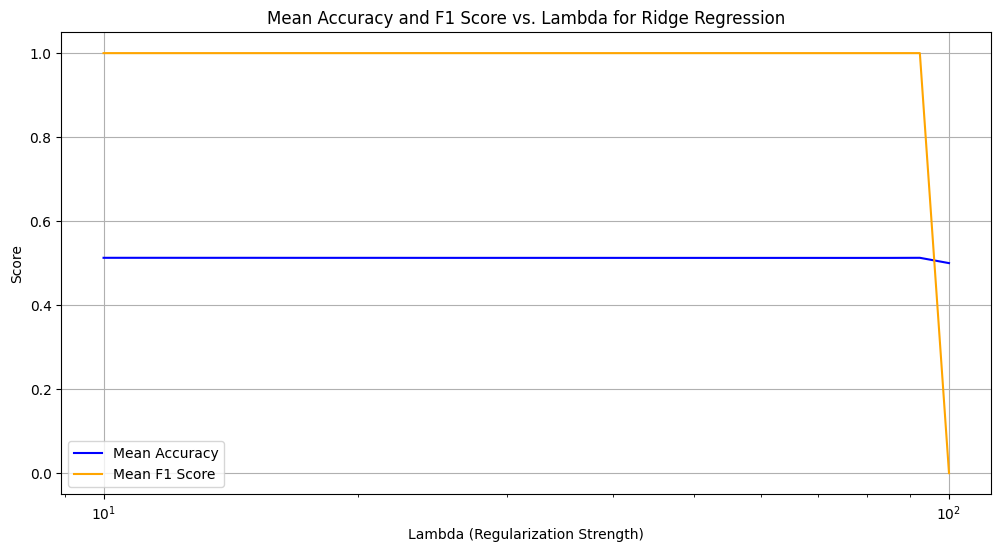

In [95]:
mean_accuracies = []
mean_f1_scores = []
lambdas = np.logspace(1, 2, 30)
optimization_method = "lg_L2"


for lambda_ in lambdas:
    # Perform stratified k-fold cross-validation
    fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation_logistic_regression(
        y = y_train, 
        tx = x_train, 
        k_folds = k_folds, 
        max_iters = max_iters, 
        gamma = gamma, 
        lambda_ = lambda_, 
        optimization_method = optimization_method
        )
    
    mean_accuracies.append(mean_val_accuracy)
    mean_f1_scores.append(mean_val_f1_score)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambdas, mean_accuracies, label='Mean Accuracy', color='blue')
plt.plot(lambdas, mean_f1_scores, label='Mean F1 Score', color='orange')

#plt.xscale('log')  # Log scale for lambda
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Score')
plt.title('Mean Accuracy and F1 Score vs. Lambda for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

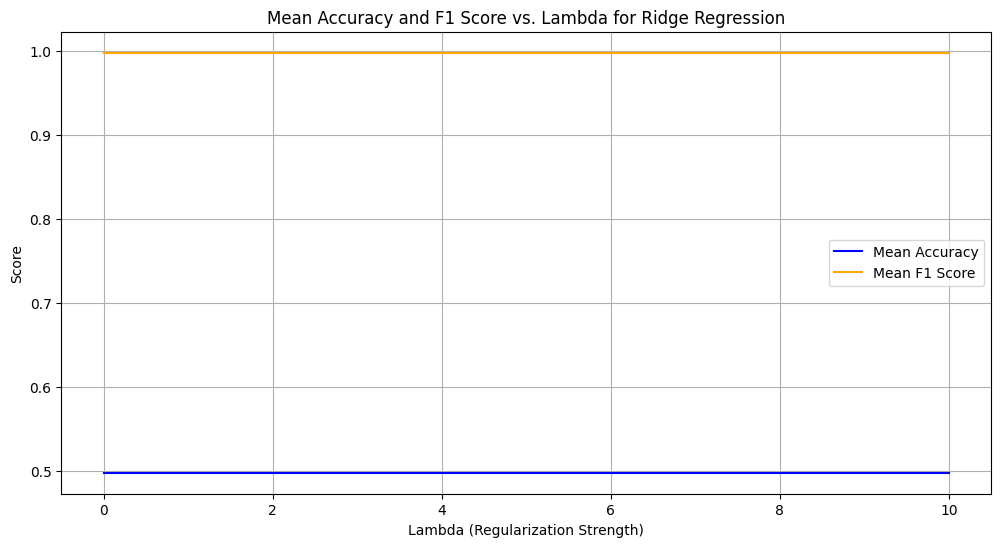

In [101]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambdas, mean_accuracies, label='Mean Accuracy', color='blue')
plt.plot(lambdas, mean_f1_scores, label='Mean F1 Score', color='orange')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Score')
plt.title('Mean Accuracy and F1 Score vs. Lambda for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

# SVM

In [106]:
# Instantiate the SVM
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=50)

# Train the model
svm.fit(x_train, y_train)

predictions = svm.predict(x_train)
print("Predictions:", predictions[:])

Predictions: [1. 1. 1. ... 1. 1. 1.]
